# This works, but
* There are still some dimension / normalization stuff that doesn't make sense, but works and may work worse if "fixed"

In [1]:
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt

from tlefit_equinoctial_jax import *

In [3]:
line1 = '1 25544U 98067A   14020.93268519  .00009878  00000-0  18200-3 0  5082'
line2 = '2 25544  51.6498 109.4756 0003572  55.9686 274.8005 15.49815350868473'
satellite = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)

line1 = '1 40019U 14033K   21064.48089419  .00000027  00000-0  13123-4 0  9994'
line2 = '2 40019  97.7274 245.3630 0083155 314.3836  45.0579 14.67086574359033'
satellite = EarthSatellite(line1, line2, 'APRIZESAT 10', ts)

In [4]:
lamda = 1e-3
hermitian = True # True
dx_limit = False # False
coe_limit = True # True
lm_reg = False # False

iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, lamda=lamda, rms_epsilon=0.0001, debug=True, hermitian = hermitian, dx_limit=dx_limit, coe_limit=coe_limit, lm_reg=lm_reg)

Initial semi-major axis (a) = 7054.852 km
COE elements (original) = [7048.523352797561, 0.0083155, 1.7056648994135064, 4.282392212570847, 5.487028934272845, 0.786408709034353, 1.3123000000000001e-05]
Residuals at epoch time [ 5.60046126e-01 -3.55208784e+00 -1.46641965e+01 -2.73377804e-03
 -7.52656544e-03  1.66212876e-04]
Residual magnitudes at epoch time 15.0987, 0.00800939


#################### ITERATION 1 ####################

Condition number (A): 61872.717
Condition number (ATWA_acc): 14622579.910297832
Lambda:  0.001
Residuals after/before 12.2 < 8.2e+06
Covariance a: 78639.013 m
dx  [-6.33060278e+00 -7.70058258e-04  8.50598337e-04 -1.98643666e-06
 -9.39084777e-05 -4.11739472e-05 -8.28908469e-04]
COE elements = [7048.520930276067, DeviceArray(0.00832911, dtype=float64), DeviceArray(1.70566497, dtype=float64), DeviceArray(4.28239372, dtype=float64), DeviceArray(5.48769159, dtype=float64), DeviceArray(0.7857478, dtype=float64), -0.0008279084686623482]
EQN elements = (7048.520930276

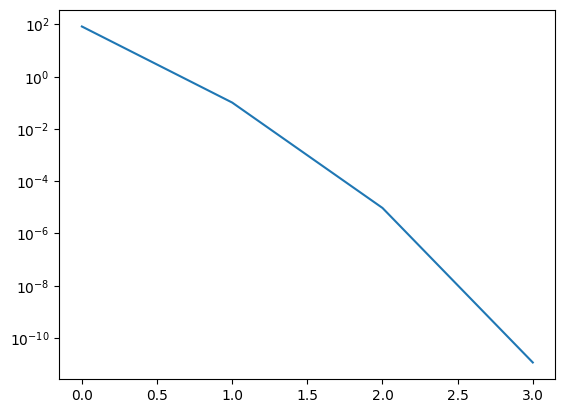

In [5]:
plt.semilogy(range(len(sigmas)), sigmas)

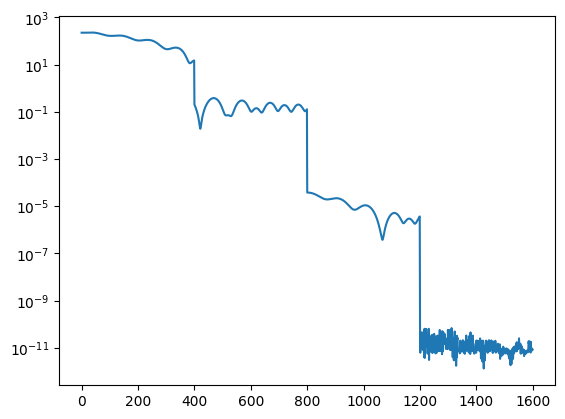

In [6]:
plt.semilogy(bs)

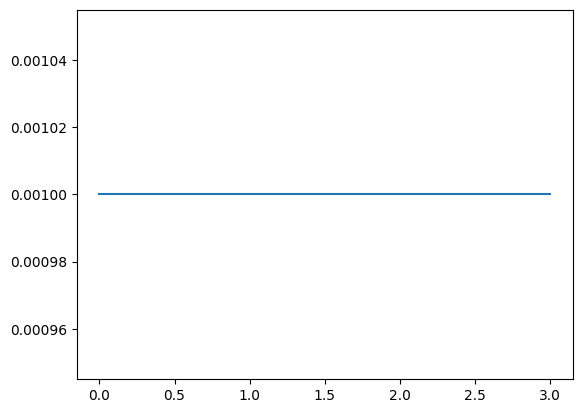

In [7]:
plt.plot(range(len(lamdas)), lamdas)

/home/dan/GIT/tle-tailor/.venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


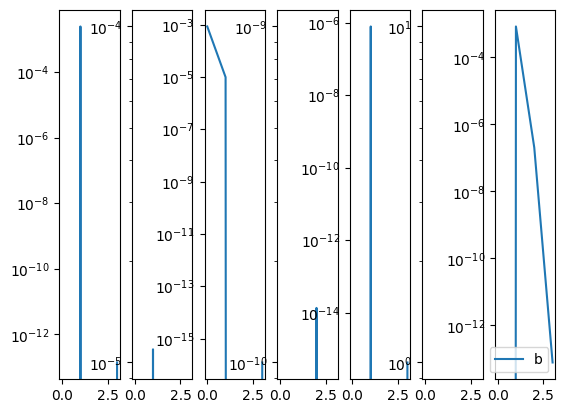

In [8]:
legends = ['a', 'e', 'i', 'w', 'argp', 'm', 'b*']

_dxs = np.array(dxs).reshape(-1, 7)

fig, axs = plt.subplots(1, 7)
for x in range(7):
    axs[x].semilogy(_dxs[:, x])
    plt.legend(legends[x])

## Play with fit span

In [9]:
debug = False

fits = []
its = []
sigs = []

# FIXME: Try timing the function as well

for x in range(1, 5):
    iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, fit_span=x, lamda=1e-3, rms_epsilon=0.0001, debug=debug)
    if debug:
        print()
        print('#' * 80)
        print()
    fits.append(x)
    its.append(iterations)
    sigs.append(sigma)

Text(0, 0.5, 'Iterations')

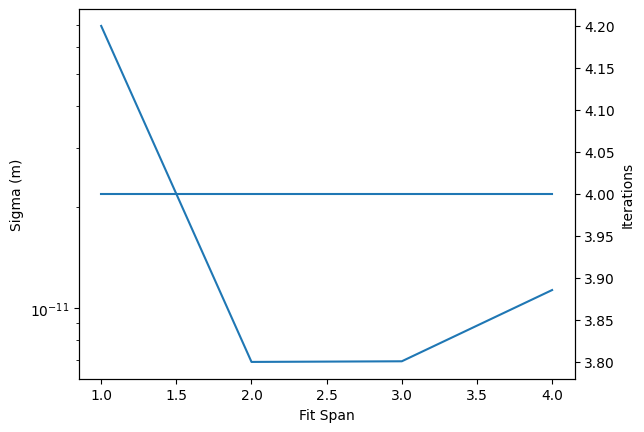

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.semilogy(fits, sigs)
ax2.plot(fits, its)

ax1.set_xlabel("Fit Span")
ax1.set_ylabel("Sigma (m)")
ax2.set_ylabel("Iterations")

In [11]:
ls tles/*.txt

tles/22335.txt    tles/boom.txt         tles/gps-ops.txt  tles/spire.txt
tles/active.txt   tles/cubesat.txt      tles/planet.txt   tles/stations.txt
tles/analyst.txt  tles/engineering.txt  tles/ses.txt


In [29]:
tle_filename = 'tles/TWOLINE.TXT'
tle_filename = 'tles/22335.txt'

In [30]:
!head $tle_filename

0 VANGUARD 1
1 00005U 58002B   22334.74432056  .00000101  00000-0  15418-3 0  9999
2 00005  34.2490 346.9265 1845722  66.0949 312.1720 10.85038156302601
0 VANGUARD 1
1 00005U 58002B   22335.11262076  .00000100  00000-0  15292-3 0  9993
2 00005  34.2490 345.7915 1845718  67.7532 310.8033 10.85038245302646
0 VANGUARD 2
1    11U 59001A   22335.21011001  .00000606  00000-0  30430-3 0  9993
2    11  32.8791 287.3922 1465359 275.6560  67.9281 11.86232147723203
0 VANGUARD 2


In [31]:
with open(tle_filename, 'r') as f:
    
    tle_lines = f.readlines()
    
    tles = []
    
    for cnt, ix in enumerate(range(0, len(tle_lines), 3)):
        #print(cnt, ix, tle_lines[ix])
        tles.append((tle_lines[ix].strip(), tle_lines[ix + 1].strip(), tle_lines[ix + 2].strip()))
        

In [32]:
len(tles)

47695

In [33]:
if tle_filename.split('/')[-1] == 'TWOLINE.TXT':
    with open(tle_filename, 'r') as f:

        tle_lines = f.readlines()

        tles = []
        tle = []

        for line in tle_lines:
            if line.startswith('#'):
                continue
                
            tle.append(line.strip())
            
            if line.startswith('2 '):
                tles.append((tle[0][2:9], tle[0], tle[1]))
                tle = []
        

In [34]:
tles[:3]

[('0 VANGUARD 1',
  '1 00005U 58002B   22334.74432056  .00000101  00000-0  15418-3 0  9999',
  '2 00005  34.2490 346.9265 1845722  66.0949 312.1720 10.85038156302601'),
 ('0 VANGUARD 1',
  '1 00005U 58002B   22335.11262076  .00000100  00000-0  15292-3 0  9993',
  '2 00005  34.2490 345.7915 1845718  67.7532 310.8033 10.85038245302646'),
 ('0 VANGUARD 2',
  '1    11U 59001A   22335.21011001  .00000606  00000-0  30430-3 0  9993',
  '2    11  32.8791 287.3922 1465359 275.6560  67.9281 11.86232147723203')]

In [35]:
# LM Test

limit = 100 #9*1000000
failed_tles = []
results = []

print(f'{"TLE":24s} {"Iter":>5s} {"Cov (m)":>10s}   {"StdDev (m)":>10s}   {"Res @ Epoch (m)":>13s}   {"Res @ End (m)":>13s}')

for idx, tle in enumerate(tles):

    line1 = tle[1]
    line2 = tle[2]
    satellite = EarthSatellite(line1, line2, tle[0], ts)
    
    try:
        iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, fit_span=1, max_iter=25, lamda=1e-3, rms_epsilon=0.0001, debug=False)

        results.append((idx, iterations, sigma, lamdas, b_new_epoch, b, P))
        
        print(f'{tle[0]:24s} {iterations:5d} {np.sqrt(np.diag(P)[0]) * 1000:10.3f} {sigma * 1000:12.2e} {np.linalg.norm(b_new_epoch[0:3]) * 1000:17.2e} {np.linalg.norm(b[0:3]) * 1000:15.2e}')
    except:
        print(f'{tle[0]:24s} Failed')
        failed_tles.append(idx)
    
    if idx == limit:
        break
    

TLE                       Iter    Cov (m)   StdDev (m)   Res @ Epoch (m)   Res @ End (m)
0 VANGUARD 1                 4    183.962     4.52e-07          1.52e-06        1.39e-06
0 VANGUARD 1                 4    181.991     4.28e-07          1.44e-06        1.34e-06
0 VANGUARD 2                 4    228.904     1.07e-07          5.60e-07        5.47e-07
0 VANGUARD 2                 4    231.200     1.11e-07          5.75e-07        5.45e-07
0 VANGUARD R/B               4    107.688     1.37e-07          3.44e-07        3.28e-07
0 VANGUARD R/B               4    105.762     1.32e-07          3.34e-07        3.19e-07
0 VANGUARD R/B               4    103.892     1.27e-07          3.22e-07        3.16e-07
0 VANGUARD R/B               4    195.868     6.09e-07          2.04e-06        1.91e-06
0 VANGUARD R/B               4    194.741     5.74e-07          1.94e-06        1.82e-06
0 VANGUARD 3                 4    215.510     8.49e-08          4.06e-08        2.98e-08
0 VANGUARD 3         

[10, 13]

In [20]:
import pandas as pd

idx, iterations, sigma, lamdas, b_new_epoch, b, P = results[10]

df = pd.DataFrame(results, columns=['idx', 'iter', 'rms', 'lamdas', 'b_epoch', 'b_end', 'cov'])
df

,idx,iter,rms,lamdas,b_epoch,b_end,cov
0,0,6,2.493450e-11,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.001]","[[-5.4569682106375694e-12, -1.318767317570746e...","[-7.275957614183426e-12, -1.2505552149377763e-...","[[0.055725990885252034, 2.240568206374482e-06,..."
1,1,3,6.710822e-05,"[0.001, 0.001, 0.001]","[[-0.0001821808064050856, 6.493695400422439e-0...","[-0.00018247896241518902, 6.538461457239464e-0...","[[0.002250084872663806, 6.5363671897875555e-09..."
2,2,8,1.669323e-09,"[0.001, 0.001, 0.001, 0.01, 0.1, 1.0, 10.0, 1....","[[-1.9099388737231493e-11, -1.3642420526593924...","[-1.4551915228366852e-11, -8.185452315956354e-...","[[0.018714816612631746, 1.4781005469149124e-06..."
3,3,17,4.319950e-11,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0...","[[2.0463630789890885e-11, 1.291482476517558e-1...","[0.0, 1.418811734765768e-10, -6.42330633127130...","[[0.813425972239293, -1.3651578574104413e-05, ..."
4,4,16,1.452266e-10,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0...","[[-2.964952727779746e-10, 1.291482476517558e-1...","[-2.7284841053187847e-10, 1.2323653209023178e-...","[[0.8234258590054152, -1.442078904312504e-05, ..."
...,...,...,...,...,...,...,...
60,62,8,1.102022e-11,"[0.001, 0.001, 0.001, 0.01, 0.1, 1.0, 10.0, 1....","[[1.000444171950221e-11, 1.0913936421275139e-1...","[7.275957614183426e-12, 1.1823431123048067e-11...","[[0.02464173041732413, -1.8949640483733119e-06..."
61,63,19,1.748013e-05,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.1,...","[[3.321038093417883e-07, 1.3668613974004984e-0...","[3.3261312637478113e-07, 1.3510725693777204e-0...","[[0.0019805313769748526, -2.2808034969452802e-..."
62,64,5,1.694331e-10,"[0.001, 0.001, 0.001, 0.001, 0.001]","[[-3.2741809263825417e-11, 2.546585164964199e-...","[-2.7284841053187847e-11, 2.2737367544323206e-...","[[0.0234063912945913, -1.8003276348552149e-06,..."
63,65,8,1.294105e-08,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0...","[[-8.334609447047114e-09, -2.7781425160355866e...","[-8.154529496096075e-09, -2.802153176162392e-0...","[[0.0006211827446438591, -6.928335760321728e-0..."


In [21]:
failed_tles

[10, 13]

In [22]:
df['b_epoch_mag'] = df.b_epoch.apply(lambda x: np.linalg.norm(x[:3]))
df['b_end_mag'] = df.b_end.apply(lambda x: np.linalg.norm(x[:3]))
df['cov'] = df['cov'].apply(lambda x: np.sqrt(x[0,0]) * 1000)
df = df.drop(['b_epoch', 'b_end'], axis=1)

In [72]:
# df.to_feather('eqn_jax_results.fth')

<AxesSubplot: >

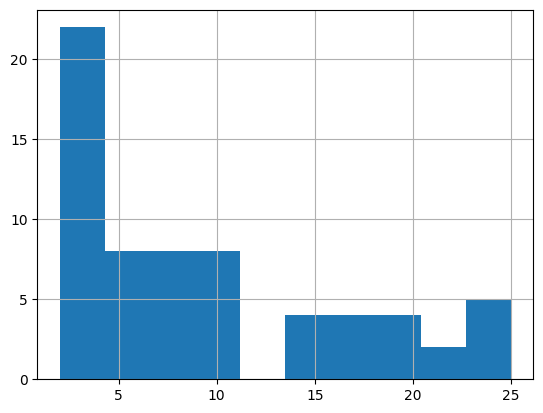

In [25]:
df.iter.hist()

<AxesSubplot: ylabel='Frequency'>

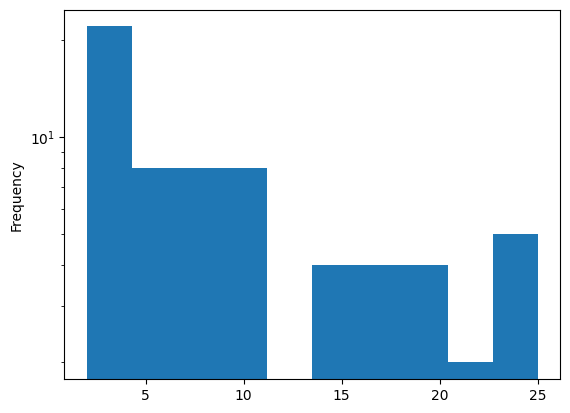

In [26]:
df.iter.plot(kind='hist', logy=True)

<AxesSubplot: >

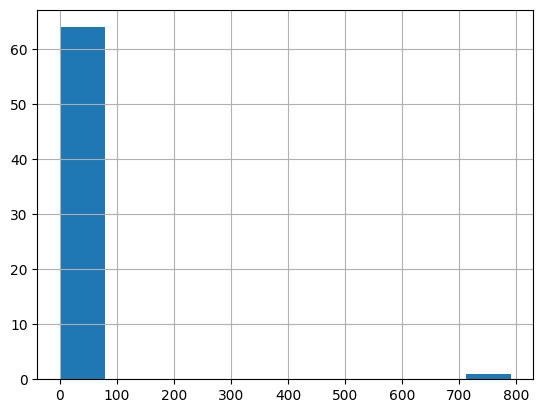

In [27]:
df.rms.hist()

<AxesSubplot: ylabel='Frequency'>

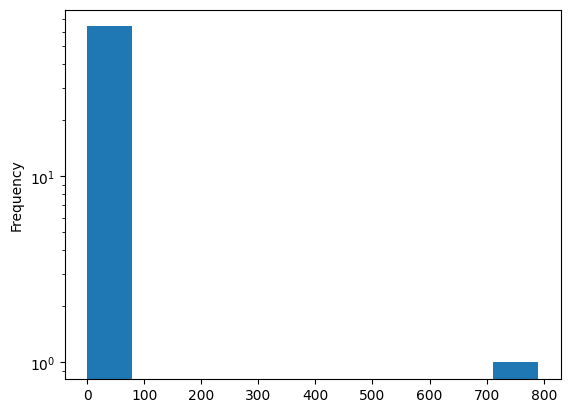

In [28]:
df.rms.plot(kind='hist', logy=True)

<AxesSubplot: >

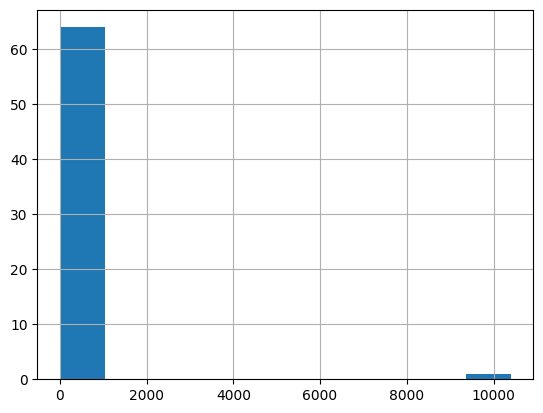

In [29]:
df.b_epoch_mag.hist()

<AxesSubplot: ylabel='Frequency'>

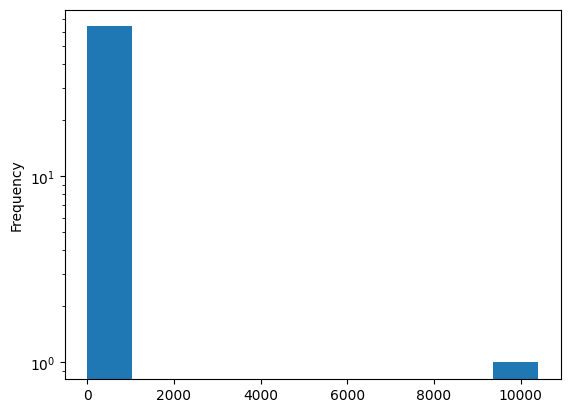

In [30]:
df.b_epoch_mag.plot(kind='hist', logy=True)

<AxesSubplot: >

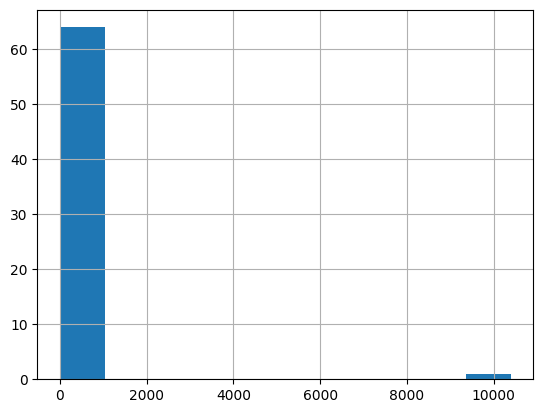

In [31]:
df.b_end_mag.hist()

<AxesSubplot: ylabel='Frequency'>

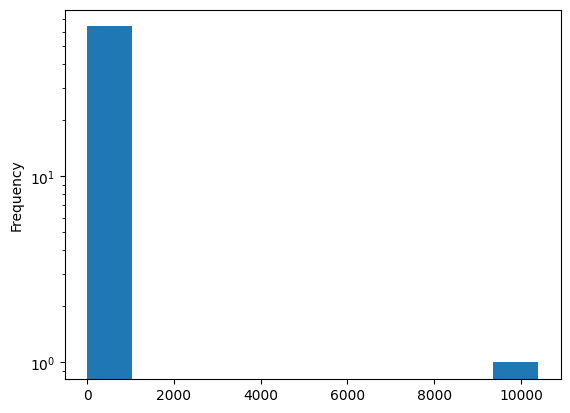

In [32]:
df.b_end_mag.plot(kind='hist', logy=True)

SVD fails and nothing fixes it unless we restart

In [183]:
tle= tles[failed_tles[0]]
line1 = tle[1]
line2 = tle[2]

print(tle[0])
print(tle[1])
print(tle[2])
print()

lamda = 1e-3

satellite = EarthSatellite(line1, line2, tle[0], ts)

while True:

    try:
        iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, fit_span=1, max_iter=25, lamda=lamda, rms_epsilon=0.0001, debug=False)
    except np.linalg.LinAlgError:
        lamda *= 10
        continue

    break

print(f'Converged with starting Lamda: {lamda}\n')

iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, fit_span=1, max_iter=25, lamda=lamda, rms_epsilon=0.0001, debug=True)

22312U 
1 22312U 93002D   06094.46235912  .99999999  81888-5  49949-3 0  3953
2 22312  62.1486  77.4698 0308723 267.9229  88.7392 15.95744531 98783

Converged with starting Lamda: 0.01

Initial semi-major axis (a) = 6670.999 km
COE elements (original) = [6664.379630419182, 0.0308723, 1.0846976955049479, 1.3521030808615033, 4.676136746491516, 1.548791215585752, 0.00049949]
Residuals at epoch time [ 6.44327761e+00  4.80623042e-01 -1.17130376e+01  3.05906665e-03
  7.21076458e-03  2.39228159e-03]
Residual magnitudes at epoch time 13.3769, 0.00819


#################### ITERATION 1 ####################

Condition number (A): 28.504
Condition number (ATWA_acc): 1896331975748.058
Lambda:  0.001
Residuals after/before 3.06e+05 < 6.87e+05
Covariance a: 833721.090 m
dx  [ 4.64981441e+00  1.02760066e-03 -1.33295867e-03 -2.57564621e-03
 -2.02412459e-04 -4.84594816e-05  8.71021230e-05]
COE elements = [6675.648583843307, DeviceArray(0.03120152, dtype=float64), DeviceArray(1.08470025, dtype=float64),

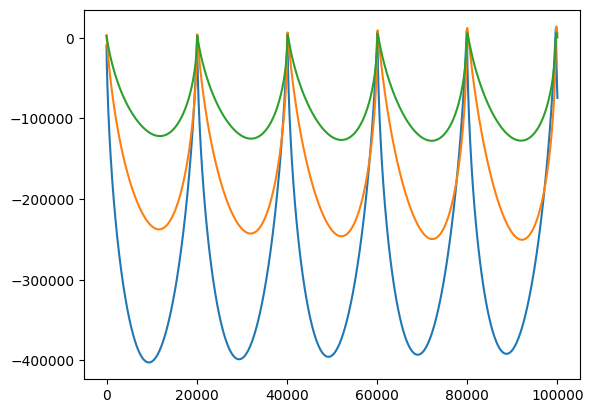

In [181]:
plt.plot([satellite.model.sgp4_tsince(_x)[1][:3] for _x in range(100000)])

In [ ]:
lamda = 1e-3 * 0 + 1
hermitian = True
dx_limit = False
coe_limit = True
lm_reg = False

print(f'{"Lamda":7s} {"Iter":>5s} {"Cov (m)":>10s}   {"StdDev (m)":>10s}   {"Res @ Epoch (m)":>13s}   {"Res @ End (m)":>13s}')

for lamda in [1e-3, 1e-2, 1e-1, 1, 10]:
    iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, lamda=lamda, rms_epsilon=0.0001, debug=False, hermitian = hermitian, dx_limit=dx_limit, coe_limit=coe_limit, lm_reg=lm_reg)

    print(f'{lamda:3.3g} {iterations:5d} {np.sqrt(np.diag(P)[0]) * 1000:10.3f} {sigma * 1000:12.2e} {np.linalg.norm(b_new_epoch[0:3]) * 1000:17.2e} {np.linalg.norm(b[0:3]) * 1000:15.2e}')

Lamda    Iter    Cov (m)   StdDev (m)   Res @ Epoch (m)   Res @ End (m)
0.001     4     12.310     1.13e-08          8.67e-09        8.46e-09
0.01     4     12.310     1.26e-08          9.64e-09        1.11e-08
0.1     4     12.310     1.26e-08          1.01e-08        1.12e-08
  1     4     12.310     1.41e-08          8.87e-09        1.04e-08
 10     4     12.310     5.77e-08          2.28e-07        2.28e-07
